# Support Vector Machine Classifiers for audio files , features extracted from MIDI    30 second data set analysis

In [128]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [129]:
data_dir = './DataStreamFeatures/DataFrames/'

df_best_features = pd.read_csv(data_dir + 'BestMusicFeatures_30seconds.csv')

df_best_features.head()

,Range,PitchVariety,NumberOfCommonPitches,IntervalBetweenStrongestPitches,MostCommonPitchPrevalence,NoteDensity,AmountOfArpeggiation,MinimumNoteDuration,StepwiseMotion,IntervalBetweenStrongestPitchClasses,...,VariabilityOfNoteDuration,MelodicOctaves,PitchClassVariety,DistanceBetweenMostCommonMelodicIntervals,MostCommonPitchClass,MelodicTritones,RelativeStrengthOfTopPitchClasses,DirectionOfMotion,Composer_name,Composer_label
0,29.0,22.0,5.0,5.0,0.126263,6.439024,0.384615,0.125,0.538462,2.0,...,0.078750,0.015385,11.0,1.0,7.0,0.005128,0.906250,0.521212,Bach,0.0
1,24.0,20.0,2.0,7.0,0.229592,6.373984,0.463918,0.125,0.427835,5.0,...,0.082307,0.020619,11.0,2.0,2.0,0.005155,0.666667,0.541667,Bach,0.0
2,24.0,19.0,2.0,7.0,0.247475,6.439024,0.474490,0.125,0.433673,5.0,...,0.084916,0.025510,11.0,2.0,2.0,0.000000,0.684211,0.513889,Bach,0.0
3,24.0,20.0,2.0,7.0,0.242268,6.308943,0.484375,0.125,0.442708,5.0,...,0.082494,0.020833,11.0,2.0,2.0,0.005208,0.627119,0.503597,Bach,0.0
4,48.0,46.0,2.0,2.0,0.099631,15.875000,0.252066,0.125,0.634298,2.0,...,0.120471,0.037190,12.0,1.0,6.0,0.020661,0.941860,0.381148,Bach,0.0


In [130]:
X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))

240 samples with 22 features each <class 'numpy.ndarray'>


In [131]:
y = df_best_features['Composer_label'].to_numpy()

y.shape

(240,)

# Scale Features using Standard Scalar

# First Trial, take only two features, can then make cool Scatter plots

In [142]:
X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))

240 samples with 22 features each <class 'numpy.ndarray'>


In [143]:
print(X.shape)

X = X[:,:2]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state = 0)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_scaled = scaler.transform(X)

print(X.shape)

(240, 22)
(240, 2)


Test different kernals some statring parameters

In [144]:
linear = svm.SVC(kernel='linear', C=10, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=10, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=10, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=10, decision_function_shape='ovo').fit(X_train, y_train)

In [145]:
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .05
#create the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

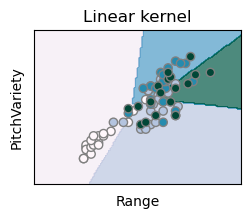

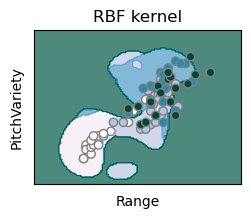

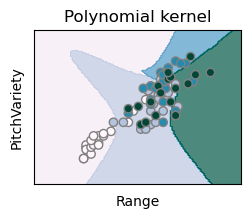

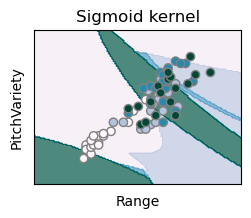

In [146]:
for i, clf in enumerate((linear, rbf, poly, sig)):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(2, 2, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)
    # Plot also the training points
    plt.scatter(X_scaled[::3, 0], X_scaled[::3, 1], c=y[::3], cmap=plt.cm.PuBuGn,     edgecolors='grey')
    plt.xlabel(training_features_list[0])
    plt.ylabel(training_features_list[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

In [136]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin)
print('Accuracy Polynomial Kernel:', accuracy_poly)
print('Accuracy Radial Basis Kernel:', accuracy_rbf)
print('Accuracy Sigmoid Kernel:', accuracy_sig)

Accuracy Linear Kernel: 0.5277777777777778
Accuracy Polynomial Kernel: 0.5277777777777778
Accuracy Radial Basis Kernel: 0.6111111111111112
Accuracy Sigmoid Kernel: 0.25


# TRY NEXT TWO FEATURES 

In [147]:
X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))

240 samples with 22 features each <class 'numpy.ndarray'>


In [148]:
print(X.shape)

X = X[:,2:4]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state = 0)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_scaled = scaler.transform(X)

print(X.shape)

(240, 22)
(240, 2)


In [149]:
linear = svm.SVC(kernel='linear', C=10, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=10, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=10, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=10, decision_function_shape='ovo').fit(X_train, y_train)

In [150]:
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .05
#create the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

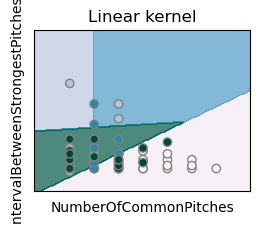

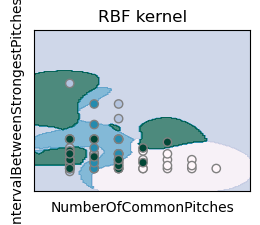

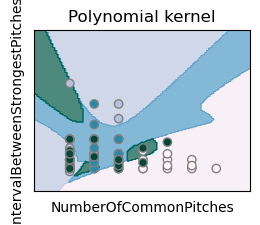

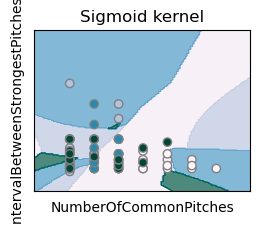

In [154]:
for i, clf in enumerate((linear, rbf, poly, sig)):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(2, 2, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.3, hspace=0.3) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)
    # Plot also the training points
    plt.scatter(X_scaled[::3, 0], X_scaled[::3, 1], c=y[::3], cmap=plt.cm.PuBuGn,     edgecolors='grey')
    plt.xlabel(training_features_list[2])
    plt.ylabel(training_features_list[3])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

In [152]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin)
print('Accuracy Polynomial Kernel:', accuracy_poly)
print('Accuracy Radial Basis Kernel:', accuracy_rbf)
print('Accuracy Sigmoid Kernel:', accuracy_sig)

Accuracy Linear Kernel: 0.4166666666666667
Accuracy Polynomial Kernel: 0.4166666666666667
Accuracy Radial Basis Kernel: 0.3611111111111111
Accuracy Sigmoid Kernel: 0.3611111111111111


# Try with Full list of Features, same parameters

In [103]:
X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state = 0)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_scaled = scaler.transform(X)

print(X_scaled.shape)

240 samples with 22 features each <class 'numpy.ndarray'>
(240, 22)


In [104]:
linear_all = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf_all = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly_all = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig_all = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [105]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin_all = linear_all.score(X_test, y_test)
accuracy_poly_all = poly_all.score(X_test, y_test)
accuracy_rbf_all = rbf_all.score(X_test, y_test)
accuracy_sig_all = sig_all.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin_all)
print('Accuracy Polynomial Kernel:', accuracy_poly_all)
print('Accuracy Radial Basis Kernel:', accuracy_rbf_all)
print('Accuracy Sigmoid Kernel:', accuracy_sig_all)

Accuracy Linear Kernel: 0.6388888888888888
Accuracy Polynomial Kernel: 0.6111111111111112
Accuracy Radial Basis Kernel: 0.3888888888888889
Accuracy Sigmoid Kernel: 0.6111111111111112


# Try Grid Search for Linear and Polynomial Kernels , which seem to work best

- based on grid search example in scikit learn documentation [Grid Search SV](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html)

In [119]:
## will use cross validation for the grid search... 

X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))


#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state = 0)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#Scale X and take all X and y

X_scaled = scaler.fit_transform(X)

print(X.shape)

240 samples with 22 features each <class 'numpy.ndarray'>
(240, 22)


In [120]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC

param_grid = [{'kernel': ['linear'],'C': [10, 100, 1000,10000]},
                {'kernel': ['sigmoid'], 'C': [10, 100, 1000,10000]},
              {'kernel': ['rbf'], 'gamma': [1e-2,1e-3],
                     'C': [10, 100, 1000,10000]}]

# not sure why, grid search didn't like the polynomial kernel...

svc = SVC(random_state=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv)
search.fit(X_scaled, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=0),
             estimator=SVC(random_state=0),
             param_grid=[{'C': [10, 100, 1000, 10000], 'kernel': ['linear']},
                         {'C': [10, 100, 1000, 10000], 'kernel': ['sigmoid']},
                         {'C': [10, 100, 1000, 10000], 'gamma': [0.01, 0.001],
                          'kernel': ['rbf']}])

In [121]:
results_df = pd.DataFrame(search.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
1000_0.01_rbf,"{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}",1,0.664167,0.065171
10000_0.01_rbf,"{'C': 10000, 'gamma': 0.01, 'kernel': 'rbf'}",1,0.664167,0.065171
100_0.01_rbf,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",3,0.658333,0.065085
10000_0.001_rbf,"{'C': 10000, 'gamma': 0.001, 'kernel': 'rbf'}",4,0.634167,0.063487
10_0.01_rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",5,0.619167,0.070593
1000_0.001_rbf,"{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}",6,0.618333,0.066332
100_linear,"{'C': 100, 'kernel': 'linear'}",7,0.613333,0.070484
10000_linear,"{'C': 10000, 'kernel': 'linear'}",8,0.610833,0.066594
1000_linear,"{'C': 1000, 'kernel': 'linear'}",9,0.608333,0.066406


In [157]:
# View the accuracy score
print('Best score for training data:', search.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',search.best_estimator_.C,"\n") 
print('Best Kernel:',search.best_estimator_.kernel,"\n")
print('Best Gamma:',search.best_estimator_.gamma,"\n")

final_model = search.best_estimator_

Best score for training data: 0.6641666666666667 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.01 



In [ ]:
# TO PREDICT 

# need to apply standardScalar to the test data set with 22 features... then call predict method on model

#Y_pred = final_model.predict(X_test_scaled)

# Try model with grid search parameters and top two features ? 


In [158]:
X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))

240 samples with 22 features each <class 'numpy.ndarray'>


In [159]:
print(X.shape)

X = X[:,:2]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state = 0)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_scaled = scaler.transform(X)

print(X.shape)

(240, 22)
(240, 2)


In [160]:
rbf_two_features = svm.SVC(kernel='rbf', gamma=0.01, C=1000, decision_function_shape='ovo').fit(X_train, y_train)

In [161]:
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .05
#create the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

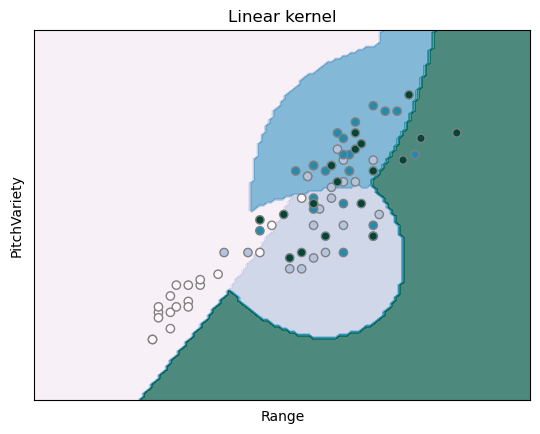

In [164]:
for i, clf in enumerate((rbf_two_features,)):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(1, 1, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)
    # Plot also the training points
    plt.scatter(X_scaled[::3, 0], X_scaled[::3, 1], c=y[::3], cmap=plt.cm.PuBuGn,     edgecolors='grey')
    plt.xlabel(training_features_list[0])
    plt.ylabel(training_features_list[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

In [168]:
# retrieve the accuracy and print it for all 4 kernel functions

accuracy_rbf_two_features_test = rbf_two_features.score(X_test, y_test)

accuracy_rbf_two_features_train = rbf_two_features.score(X_train, y_train)

print('TEST Accuracy Radial Basis Kernel two features:', accuracy_rbf_two_features_test)

print('TRAIN Accuracy Radial Basis Kernel two features:', accuracy_rbf_two_features_train)


TEST Accuracy Radial Basis Kernel two features: 0.5833333333333334
TRAIN Accuracy Radial Basis Kernel two features: 0.5392156862745098


In [ ]:
# if time, search choice of C , see how it effects this, do we want more regularization ? 